In [89]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc, font_manager 
import seaborn as sns
%matplotlib inline
plt.rc("font", family="Malgun Gothic")  
plt.rcParams['axes.unicode_minus'] = False

In [90]:
df = pd.read_excel('슈퍼스토어.xls')
df_return = pd.read_excel('반품 정리.xls')


# df["주문 월"] = df['주문 날짜'].dt.month

temp = df_return['주문 ID'].unique()
df['반품'] = 0
for i in range(len(df)):
    if df['주문 ID'][i] in temp:
        df['반품'].iat[i] = 1

In [91]:
df.columns

Index(['행 ID', '주문 ID', '주문 날짜', '배송 날짜', '배송 형태', '고객 ID', '고객 이름', '세그먼트',
       '도시', '시/도', '국가/지역', '지역', '제품 ID', '범주', '하위 범주', '제품 이름', '매출', '수량',
       '할인율', '수익', '반품'],
      dtype='object')

In [92]:
#제품 : 범주 하위범주 반품 수익 할인율 수량 배송 형태 세그먼트 
# [제품단가 : 매출 / 수량] -> 제품단가

# 많이 사면 할인 ? 

In [93]:
df.head(3)

,행 ID,주문 ID,주문 날짜,배송 날짜,배송 형태,고객 ID,고객 이름,세그먼트,도시,시/도,...,지역,제품 ID,범주,하위 범주,제품 이름,매출,수량,할인율,수익,반품
0,1,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,...,북아시아,OFF-PA-10000026,사무용품,용지,"Eaton Cards & Envelopes, 8.5 x 11",197.28,4,0.0,35.40,1
1,2,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,...,북아시아,FUR-FU-10000944,가구,사무용 집기,"Tenex Door Stop, Black",307.23,7,0.0,21.42,1
2,3,IN-2020-27828,2020-08-27,2020-08-31,표준 등급,VT-21700,Valerie Takahito,홈 오피스,Quanzhou,Fujian,...,북아시아,TEC-CO-10002526,기술,복사기,"Sharp Wireless Fax, Digital",1422.24,4,0.0,526.20,1


In [94]:
df3 = pd.read_excel('인력.xls')

In [95]:
df3

,사람,지역
0,Sanjit Engle,동남아시아
1,Maribeth Dona,중앙아시아
2,Alex Avila,북아시아
3,Nora Pelletier,오세아니아


# 문제 정의를 위한 탐색적 데이터 분석

In [96]:
Alex_Avila = df.query("지역 == '북아시아'")
Maribeth_Dona = df.query("지역 == '중앙아시아'")
Nora_Pelletier = df.query("지역 == '오세아니아'")
Sanjit_Engle = df.query("지역 == '동남아시아'")

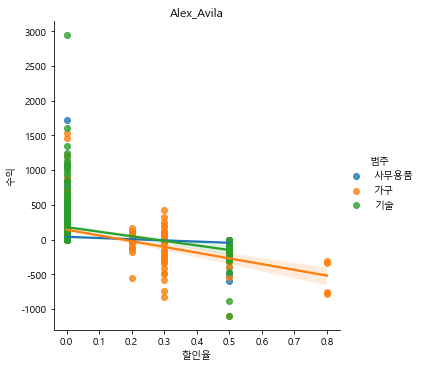

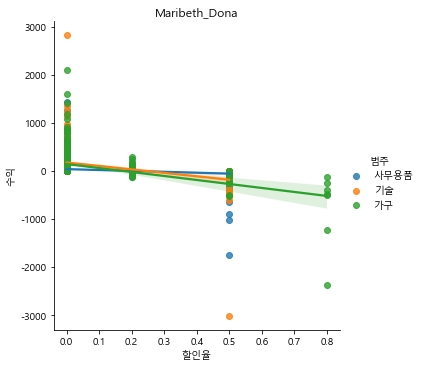

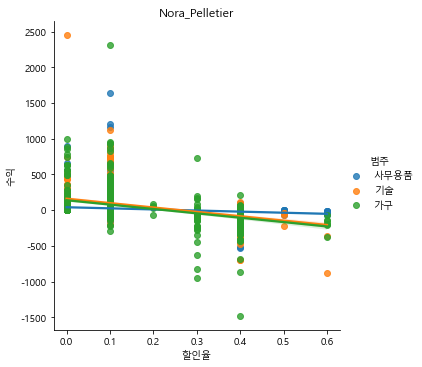

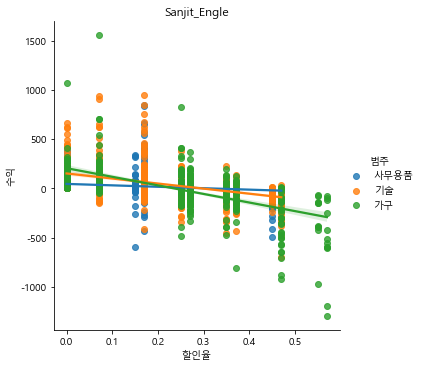

In [97]:
sns.lmplot(data=Alex_Avila, x="할인율", y="수익", hue="범주", fit_reg=True).set(title='Alex_Avila')
plt.show()

sns.lmplot(data=Maribeth_Dona, x="할인율", y="수익", hue="범주", fit_reg=True).set(title='Maribeth_Dona')
plt.show()

sns.lmplot(data=Nora_Pelletier, x="할인율", y="수익", hue="범주", fit_reg=True).set(title='Nora_Pelletier')
plt.show()

sns.lmplot(data=Sanjit_Engle, x="할인율", y="수익", hue="범주", fit_reg=True).set(title='Sanjit_Engle')
plt.show()

In [98]:
Alex_Avila = df.query("지역 == '북아시아'")
Maribeth_Dona = df.query("지역 == '중앙아시아'")
Nora_Pelletier = df.query("지역 == '오세아니아'")
Sanjit_Engle = df.query("지역 == '동남아시아'")

In [99]:
Alex_Avila = df.query("지역 == '북아시아'")
Maribeth_Dona = df.query("지역 == '중앙아시아'")
Nora_Pelletier = df.query("지역 == '오세아니아'")
Sanjit_Engle = df.query("지역 == '동남아시아'")

# 수익

,매출
지역,
동남아시아,884107.359
북아시아,848179.941
오세아니아,1100184.612
중앙아시아,733968.147


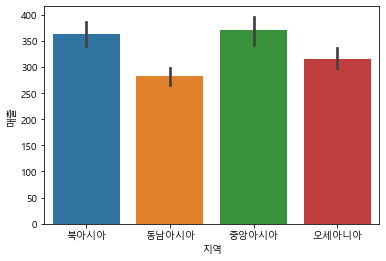

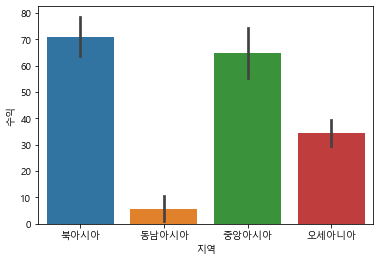

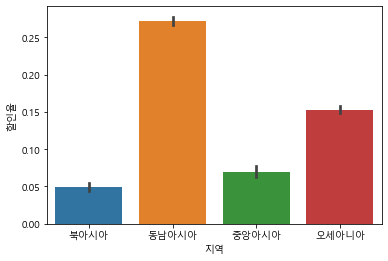

In [100]:
temp = pd.DataFrame(df.groupby("지역")["매출"].sum())
display(temp)
sns.barplot(data=df, x='지역', y='매출')
plt.show()
sns.barplot(data=df, x='지역', y='수익')
plt.show()
sns.barplot(data=df, x='지역', y='할인율')
plt.show()

In [13]:
temp_1 = pd.DataFrame(df.groupby("지역")["수량"].sum())
temp_1

,수량
지역,
동남아시아,11818
북아시아,8845
오세아니아,12838
중앙아시아,7521


In [14]:
temp_2 = pd.DataFrame(df.groupby("지역")["수익"].sum())
temp_2

,수익
지역,
동남아시아,17885.829
북아시아,165567.801
오세아니아,120089.112
중앙아시아,128511.637


- 동남아시아 문제有
    - 많이 팔았는데 수익을 못남겼네 -> 뭘팔았길래.
     
- 북아시아, 중앙아시아
    - 적게 팔고, 수익 많이 남겼네 -> 뭘팔았길래.

---

In [15]:
Alex_Avila = df.query("지역 == '북아시아'")
Maribeth_Dona = df.query("지역 == '중앙아시아'")
Nora_Pelletier = df.query("지역 == '오세아니아'")
Sanjit_Engle = df.query("지역 == '동남아시아'")

In [16]:
display(pd.DataFrame(Alex_Avila.groupby("범주")["수량"].sum())) # 북아시아
display(pd.DataFrame(Maribeth_Dona.groupby("범주")["수량"].sum())) # 중앙아시아
display(pd.DataFrame(Nora_Pelletier.groupby("범주")["수량"].sum())) # 오세아니아
display(pd.DataFrame(Sanjit_Engle.groupby("범주")["수량"].sum())) # 동남아시아

,수량
범주,
가구,1992
기술,1862
사무용품,4991


,수량
범주,
가구,1712
기술,1714
사무용품,4095


,수량
범주,
가구,2728
기술,2906
사무용품,7204


,수량
범주,
가구,2627
기술,2467
사무용품,6724


뭘 팔았는지는 크게 중요하진 않아 보이네.  
어쨌든 동남아시아 담당자 Sanjit 뭔가 마케팅 잘못했다.

---
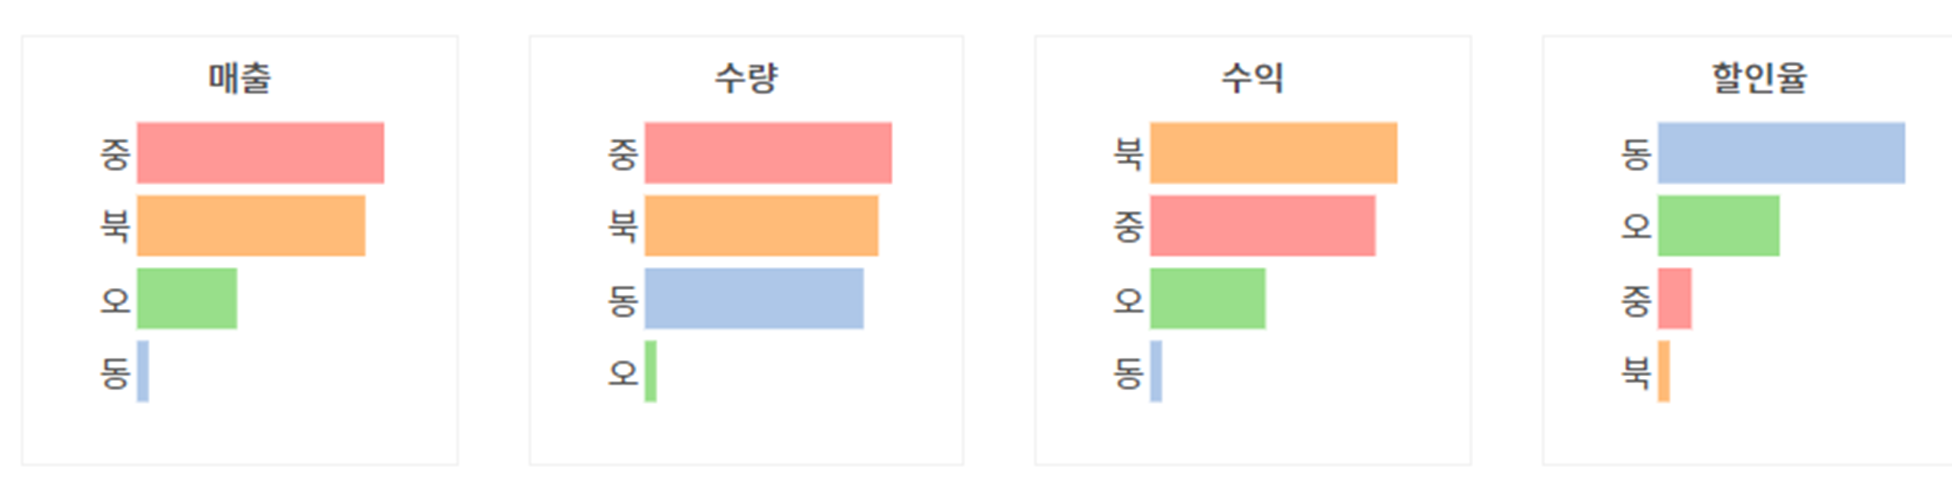

음. 확실히 할인율에 문제가 있어.  
할인 전략 어떻게 세웠길래 ?  
북아시아 담당자 Alex_Avila 벤치마킹 좀 해야할듯  
  
둘의 마케팅을 비교좀 해보자.  
동남아시아, 북아시아만 보자.

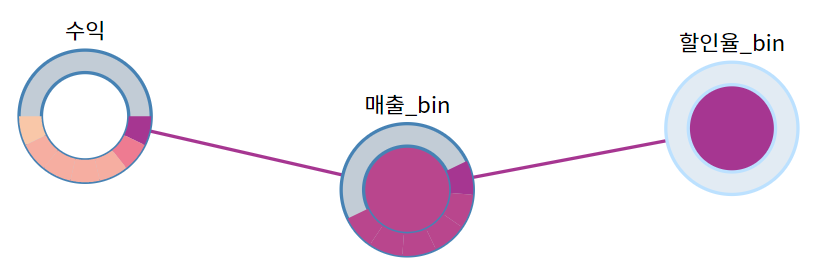 
북아시아의 수익에 기여한 변수는 매출과 할인율.  
음.. 당연한건가 ?  
  
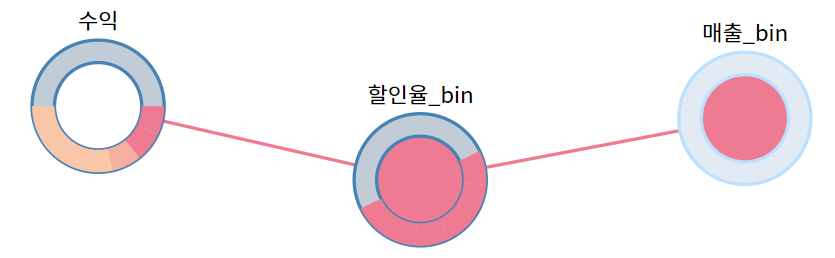
동남아시아의 수익에도 할인율이 상관성이 커보인다.  
할인 전략 문제 있어보인다. 확실히..

---
코로나 펜데믹을 기준으로 데이터가 나뉘는데,  
이를 반영했다면, 분명 Split 된 두 데이터는 차이를 보일것임.  
그래 한 번 봐보자.

# 펜데믹 전 후

In [17]:
Alex_before_pendamic = Alex_Avila[ Alex_Avila['주문 날짜'].isin(pd.date_range('2018-01-01', '2020-03-11'))]
Sanjit_before_pendamic = Sanjit_Engle[ Sanjit_Engle['주문 날짜'].isin(pd.date_range('2018-01-01', '2020-03-11'))]

Alex_after_pendamic = Alex_Avila[ Alex_Avila['주문 날짜'].isin(pd.date_range('2020-03-12', '2021-12-31'))]
Sanjit_after_pendamic = Sanjit_Engle[ Sanjit_Engle['주문 날짜'].isin(pd.date_range('2020-03-12', '2021-12-31'))]

In [18]:
display(pd.DataFrame(Alex_before_pendamic.groupby("할인율")["할인율"].mean())) # 북아시아 코로나 이전
print(len(Alex_before_pendamic))
display(pd.DataFrame(Alex_after_pendamic.groupby("하위 범주")["수량"].sum())) # 북아시아 코론나 이후
len(Alex_after_pendamic)

,할인율
할인율,
0.0,0.0
0.2,0.2
0.3,0.3
0.5,0.5
0.8,0.8


1028


,수량
하위 범주,
가전 제품,128
레이블,334
미술용품,341
바인더,380
보관함,363
복사기,312
봉투,265
사무기기,206
사무용 집기,276


1308

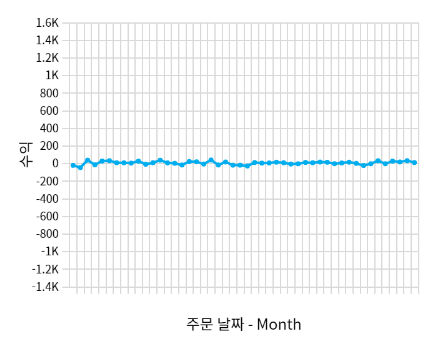  
  
음.. 근데 동남아시아도, 북아시아도 코로나 전과 후의 수익은 크게 다르지가 않아.

---

#### 판매 품목도 비슷해

In [19]:
display(pd.DataFrame(Alex_before_pendamic.groupby("범주")["수량"].sum())) # 북아시아
print(len(Alex_before_pendamic))
display(pd.DataFrame(Alex_after_pendamic.groupby("범주")["수량"].sum())) # 북아시아
len(Alex_after_pendamic)

,수량
범주,
가구,845
기술,760
사무용품,2234


1028


,수량
범주,
가구,1147
기술,1102
사무용품,2757


1308

In [20]:
display(pd.DataFrame(Sanjit_before_pendamic.groupby("범주")["수량"].sum())) # 북아시아
print(len(Sanjit_before_pendamic))
display(pd.DataFrame(Sanjit_after_pendamic.groupby("범주")["수량"].sum())) # 북아시아
len(Sanjit_after_pendamic)

,수량
범주,
가구,1049
기술,1103
사무용품,2789


1324


,수량
범주,
가구,1578
기술,1364
사무용품,3935


1803

#### 코로나 펜데믹의 영향이 반영된 데이터는 아닌 것 같은데.

그럼.. 그냥 할인율 한 번 파보자.
- Sanjit_Engle
- Alex_Avila  

할인율을 어떻게 달리 했니 너희는 ?

In [21]:
display(pd.DataFrame(Alex_Avila.groupby("할인율")["수량"].sum())) # 북아시아
display(pd.DataFrame(Sanjit_Engle.groupby("할인율")["수량"].sum())) # 동남아시아

,수량
할인율,
0.0,7859
0.2,155
0.3,128
0.5,687
0.8,16


,수량
할인율,
0.00,1384
0.07,533
0.15,319
0.17,2720
0.25,826
0.27,1453
0.35,284
0.37,246
0.45,1141


Sanjit의 할인전략 확실히 문제 있어보인다.

<AxesSubplot:xlabel='할인율', ylabel='count'>

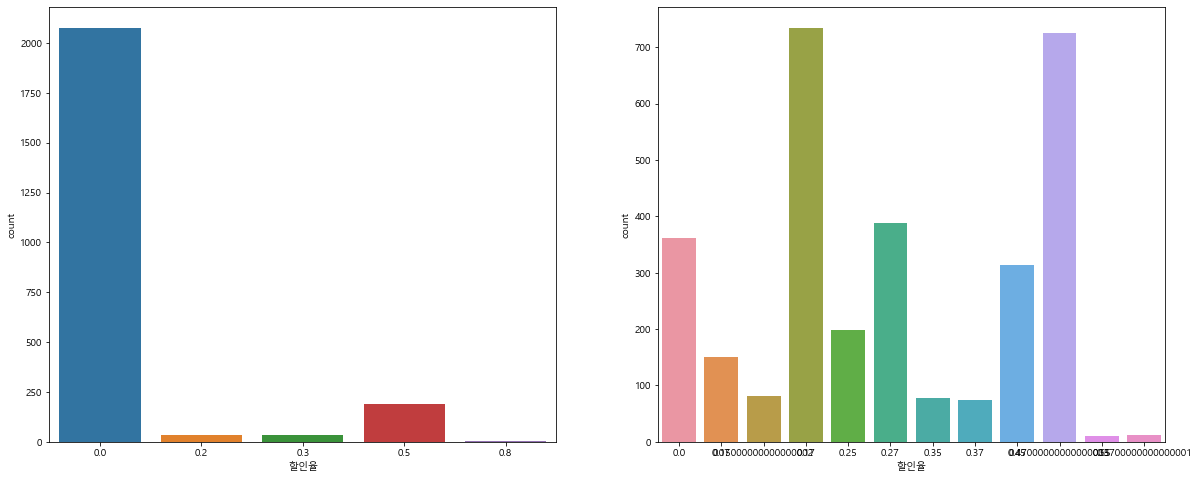

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.countplot(data=Alex_Avila, x='할인율', ax=ax[0])
sns.countplot(data=Sanjit_Engle, x='할인율', ax=ax[1])

In [23]:
display(pd.DataFrame(Alex_Avila.groupby("범주")["할인율"].mean())) # 북아시아
display(pd.DataFrame(Sanjit_Engle.groupby("범주")["할인율"].mean())) # 동남아시아

,할인율
범주,
가구,0.050575
기술,0.044421
사무용품,0.049624


,할인율
범주,
가구,0.247216
기술,0.234305
사무용품,0.295931


그냥 일단 대체로 할인을 강하게 했다..


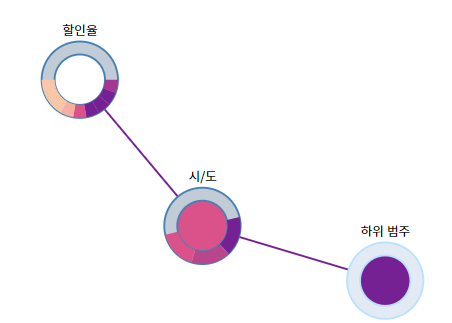

위 그림은 Sanjit의 할인율에 영향을 준 두 변수를 의미한다.

In [24]:
from scipy.stats import chi2_contingency

In [25]:
Alex_Avila['적자/흑자'] = '흑자'
for i in range(len(Alex_Avila)):
    if Alex_Avila['수익'].iloc[i] < 0:
        Alex_Avila['적자/흑자'].iat[i] = '적자'

In [26]:
Alex_Avila['적자/흑자'].value_counts()

흑자    2115
적자     221
Name: 적자/흑자, dtype: int64

In [27]:
temp_4 = pd.crosstab(Alex_Avila['할인율'], Alex_Avila['적자/흑자'], margins=True)
temp_4

적자/흑자,적자,흑자,All
할인율,,,
0.0,0,2077,2077
0.2,12,22,34
0.3,20,13,33
0.5,185,3,188
0.8,4,0,4
All,221,2115,2336


In [28]:
result=chi2_contingency(observed=temp_4)

In [29]:
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result[3]).rename(index={0:0.0, 1:0.2, 2:0.3, 3:0.5, 4:0.8, 5:'All'}, columns={0:'적자', 1:'흑자', 2:'All'})

1. 카이제곱 통계량: 2118.903047295839
2. p-value: 0.0
3. df: 10
4. 기대값 행렬:


,적자,흑자,All
0.0,196.497003,1880.502997,2077.0
0.2,3.216610,30.783390,34.0
0.3,3.122003,29.877997,33.0
0.5,17.785959,170.214041,188.0
0.8,0.378425,3.621575,4.0
All,221.000000,2115.000000,2336.0


어쨌든 할인하면 잃게 돼있음.  
장사 잘하는 Alex도 손해봐.

그럼 왜 하냐 ?

50% 이상 할인 판매한 목록만 보자..

In [30]:
temp_6 = Alex_Avila[Alex_Avila['할인율']>=0.5]

In [31]:
temp_6["주문 월"] = temp_6['주문 날짜'].dt.month

In [32]:
display(pd.DataFrame(temp_6.groupby("하위 범주")["할인율"].mean())) # 북아시아

,할인율
하위 범주,
가전 제품,0.5
레이블,0.5
미술용품,0.5
바인더,0.5
보관함,0.5
복사기,0.5
봉투,0.5
사무기기,0.5
사무용 집기,0.5


In [33]:
temp_7 = Alex_Avila[Alex_Avila['할인율']>=0.8]
temp_7['제품 ID'].unique()

array(['FUR-TA-10004050', 'FUR-TA-10001113', 'FUR-TA-10003748',
       'FUR-TA-10000147'], dtype=object)

테이블만 떨이로 주네

---

In [34]:
temp_8 = Alex_Avila[Alex_Avila['할인율']>=0.2]
temp_8["주문 월"] = temp_8['주문 날짜'].dt.month

In [35]:
display(pd.DataFrame(temp_8.groupby("주문 월")["할인율"].mean())) # 북아시아

,할인율
주문 월,
1,0.366667
2,0.431250
3,0.450000
4,0.458824
5,0.420000
6,0.456757
7,0.472727
8,0.425714
9,0.423810


아 할인은 왜 해줄까..

- 제품 당 평균 수익은?
- 제품 당 평균 매출은?
- 제품 당 평균 판매 수량은?  

---

In [36]:
Sanjit_Engle['적자/흑자'] = '흑자'
for i in range(len(Sanjit_Engle)):
    if Sanjit_Engle['수익'].iloc[i] < 0:
        Sanjit_Engle['적자/흑자'].iat[i] = '적자'

In [37]:
Sanjit_Engle['적자/흑자'].value_counts()

적자    1666
흑자    1461
Name: 적자/흑자, dtype: int64

In [38]:
# temp_5 = pd.crosstab(Sanjit_Engle['할인율'], Sanjit_Engle['적자/흑자'], margins=True)
# temp_5

# 지표 설정

1. 매출의 범위로 제품 세그먼트
2. 고가 상품인지, 아닌지를 명확히 나눔.
3. 나눈 기준에 따라서 할인율을 어떻게 설정할지 정해준다.

- 제품을 세분화 하기 위한 제품 1개 당 매출 (단가)를 계산 
: 매출 / 수량
- 제품 세그먼트
    - 정상가 : ~75%
    - 고가 : ~ 75% + (1.5XIQR)
    - 최고가 : (1.5XIQR) 기준 이상치로 잡히는 제품

! 세그먼트 수 설정 근거는 K-means Clustering Elbow point 확인  
! 기준 설정 근거는 distplot, boxplot 확인

- 제품의 할인율 재설정 필요
- 할인한 제품들 -> 할인 전략 성공 / 할인 전략 실패

In [39]:
Alex_Avila['적자/흑자'].value_counts()

흑자    2115
적자     221
Name: 적자/흑자, dtype: int64

In [40]:
Sanjit_Engle['적자/흑자'].value_counts()

적자    1666
흑자    1461
Name: 적자/흑자, dtype: int64

### ★★★★★

In [41]:
Alex_Avila['단가'] = Alex_Avila['매출']
Sanjit_Engle['단가'] = Sanjit_Engle['매출']

for i in range(len(Alex_Avila)):
    if Alex_Avila['할인율'].iloc[i] == 0.0:
        Alex_Avila['단가'].iloc[i] = Alex_Avila['매출'].iloc[i]/Alex_Avila['수량'].iloc[i]
    else:
        Alex_Avila['단가'].iloc[i] = Alex_Avila['매출'].iloc[i]/Alex_Avila['할인율'].iloc[i]/Alex_Avila['수량'].iloc[i]
    

for i in range(len(Sanjit_Engle)):
    if Sanjit_Engle['할인율'].iloc[i] == 0.0:
        Sanjit_Engle['단가'].iloc[i] = Sanjit_Engle['매출'].iloc[i]/Sanjit_Engle['수량'].iloc[i]
    else:
        Sanjit_Engle['단가'].iloc[i] = Sanjit_Engle['매출'].iloc[i]/Sanjit_Engle['할인율'].iloc[i]/Sanjit_Engle['수량'].iloc[i]

# 단가를 기준으로 세그먼트

#### Sanjit의 판매 제품 세그먼트

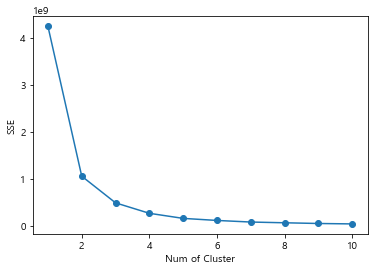

In [42]:
from sklearn.cluster import KMeans

temp_9 = pd.DataFrame()
temp_9['C1'] = Sanjit_Engle['단가']
temp_9['C2'] = Sanjit_Engle['단가']

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('Num of Cluster')
    plt.ylabel('SSE')
    plt.show()
elbow(temp_9)

In [43]:
pd.DataFrame(Sanjit_Engle['단가'].describe())

,단가
count,3127.000000
mean,395.689597
std,823.638333
min,3.870000
25%,33.474574
50%,95.805957
75%,303.800196
max,5854.615714


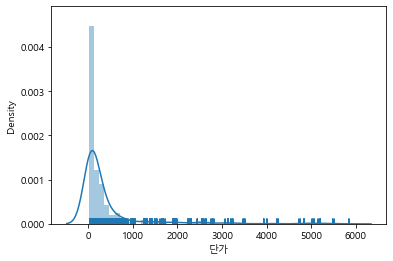

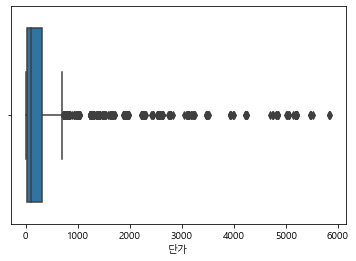

In [44]:
sns.distplot(Sanjit_Engle['단가'], kde=True, rug=True)
plt.show()
sns.boxplot(Sanjit_Engle['단가'])
plt.show()

#### Alex판매 제품 세그먼트

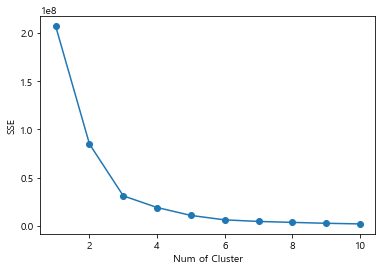

In [45]:
from sklearn.cluster import KMeans

temp_10 = pd.DataFrame()
temp_10['C1'] = Alex_Avila['단가']
temp_10['C2'] = Alex_Avila['단가']

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('Num of Cluster')
    plt.ylabel('SSE')
    plt.show()
elbow(temp_10)

In [46]:
pd.DataFrame(Alex_Avila['단가'].describe())

,단가
count,2336.000000
mean,119.104438
std,210.474321
min,3.990000
25%,18.382500
50%,47.580000
75%,138.480000
max,2158.870000


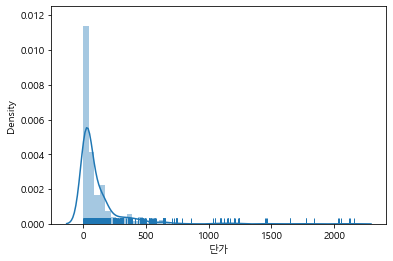

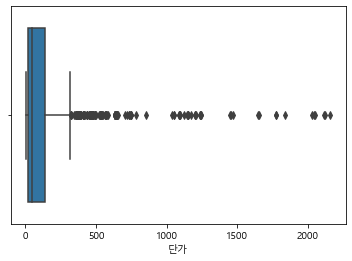

In [47]:
sns.distplot(Alex_Avila['단가'], kde=True, rug=True)
plt.show()
sns.boxplot(Alex_Avila['단가'])
plt.show()

## Sanjit 제품
Cluster 1 : M <= 95.805957  
Cluster 2 : 303.800196 + 1.5 X IQR -> 303.800196 < M<= 709.288629  
Cluster 3 : 709.288629 < M  

## Alex 제품
Cluster 1 : M <= 138.480000  
Cluster 2 : 128.891250 + 1.5 X IQR -> 128.891250 < M<= 318.62625   
Cluster 3 : 318.62625 < M    

고가 상품은 특히 할인 전략을 잘 세워야 할 것이다.  
매출을 기준으로 Cluster 1 ~ 3으로 세그먼트를 진행한다.

In [48]:
Sanjit_Engle.loc[Sanjit_Engle['단가'] <= 95.805957, '제품 가격(등급)'] = '정상가'
Sanjit_Engle.loc[(95.805957 < Sanjit_Engle['단가']) & (Sanjit_Engle['단가']<= 303.800196) , '제품 가격(등급)'] = '고가'
Sanjit_Engle.loc[303.800196 < Sanjit_Engle['단가'], '제품 가격(등급)'] = '최고가'

In [49]:
Alex_Avila.loc[Alex_Avila['단가'] <= 47.580000, '제품 가격(등급)'] = '정상가'
Alex_Avila.loc[(47.580000 < Alex_Avila['단가']) & (Alex_Avila['단가'] <=  138.480000), '제품 가격(등급)'] = '고가'
Alex_Avila.loc[138.480000 < Alex_Avila['단가'], '제품 가격(등급)'] = '최고가'

---

In [50]:
Sanjit_Engle['제품 가격(등급)'].value_counts()

정상가    1562
고가      783
최고가     782
Name: 제품 가격(등급), dtype: int64

In [51]:
Alex_Avila['제품 가격(등급)'].value_counts()

정상가    1169
최고가     585
고가      582
Name: 제품 가격(등급), dtype: int64

# 제품 단가 그룹별 특징점을 찾아보자 

일단 가장 중요한 수익을 비교해보았을 때, Sanjit은 고가, 정상가 제품들에 대해서는 적자를 내고 있다. 왜 그럴까 ?  

Sanjit


,수익
제품 가격(등급),
고가,-0.200379
정상가,-6.804422
최고가,36.663980


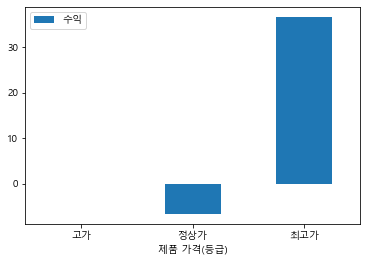

Alex


,수익
제품 가격(등급),
고가,60.335165
정상가,18.163512
최고가,186.700154


<AxesSubplot:xlabel='제품 가격(등급)'>

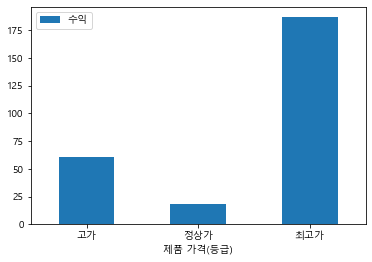

In [52]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("제품 가격(등급)")["수익"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("제품 가격(등급)")["수익"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

### 제품 등급 별 판매 할인정책 비교

Sanjit


,할인율
제품 가격(등급),
고가,0.236143
정상가,0.325077
최고가,0.202123


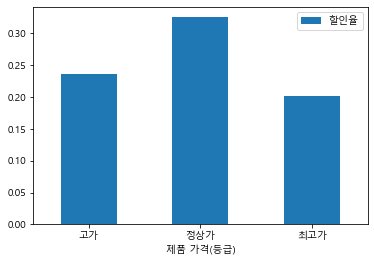

Alex


,할인율
제품 가격(등급),
고가,0.046220
정상가,0.043627
최고가,0.061538


<AxesSubplot:xlabel='제품 가격(등급)'>

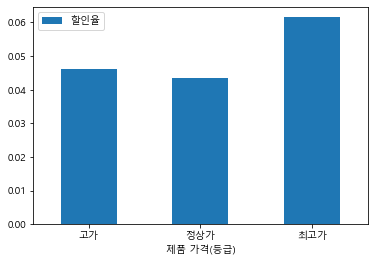

In [53]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("제품 가격(등급)")["할인율"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("제품 가격(등급)")["할인율"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

### 제품 등급 별 판매 수량 비교

In [54]:
# print('Sanjit')
# a = pd.DataFrame(Sanjit_Engle.groupby("제품 가격(등급)")["수량"].mean()) # 동남아시아
# display(a)
# a.plot.bar(rot=0)
# plt.show()
# print('Alex')
# b = pd.DataFrame(Alex_Avila.groupby("제품 가격(등급)")["수량"].mean()) # 북아시아
# display(b)
# b.plot.bar(rot=0)

---

---

## 세그먼트 분석

Sanjit


,수익
세그먼트,
기업,4.078259
일반 소비자,6.230701
홈 오피스,6.860519


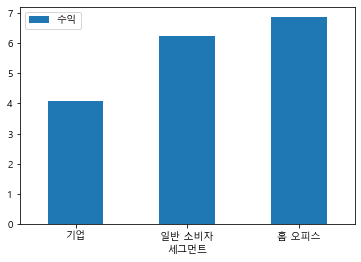

Alex


,수익
세그먼트,
기업,70.361195
일반 소비자,69.495711
홈 오피스,75.176270


<AxesSubplot:xlabel='세그먼트'>

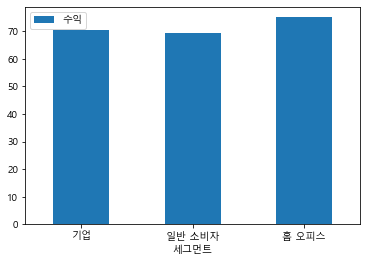

In [55]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("세그먼트")["수익"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("세그먼트")["수익"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

Sanjit


,할인율
세그먼트,
기업,0.280935
일반 소비자,0.264417
홈 오피스,0.280000


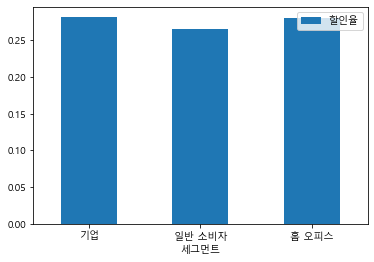

Alex


,할인율
세그먼트,
기업,0.037994
일반 소비자,0.050086
홈 오피스,0.061957


<AxesSubplot:xlabel='세그먼트'>

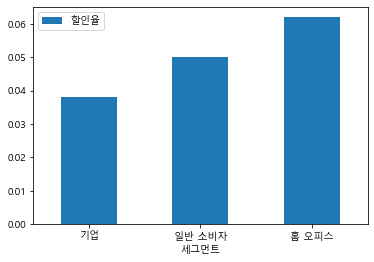

In [56]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("세그먼트")["할인율"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("세그먼트")["할인율"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

Sanjit


,수량
세그먼트,
기업,3.685369
일반 소비자,3.801578
홈 오피스,3.864912


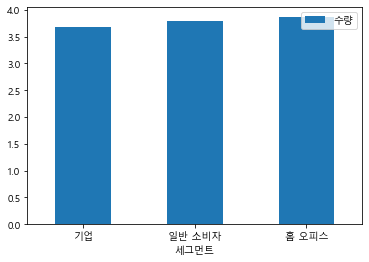

Alex


,수량
세그먼트,
기업,3.814972
일반 소비자,3.784247
홈 오피스,3.747826


<AxesSubplot:xlabel='세그먼트'>

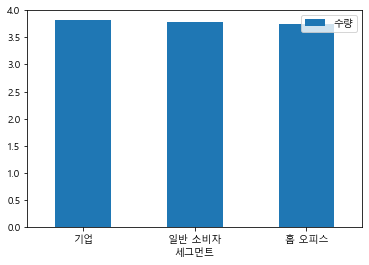

In [57]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("세그먼트")["수량"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("세그먼트")["수량"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

# 인사이트 : 세그먼트 간 할인정책을 달리했고 수익에 영향줬음

### 범주별 분석

Sanjit


,수익
범주,
가구,-10.551934
기술,31.313668
사무용품,2.356440


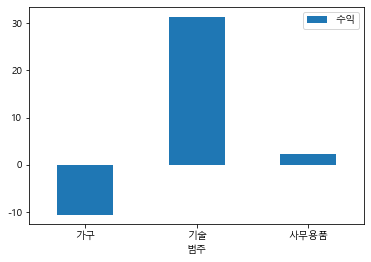

Alex


,수익
범주,
가구,99.964178
기술,149.733502
사무용품,30.763523


<AxesSubplot:xlabel='범주'>

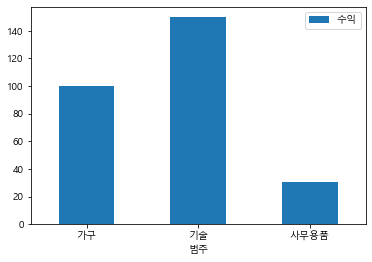

In [58]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("범주")["수익"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("범주")["수익"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

Sanjit


,할인율
범주,
가구,0.247216
기술,0.234305
사무용품,0.295931


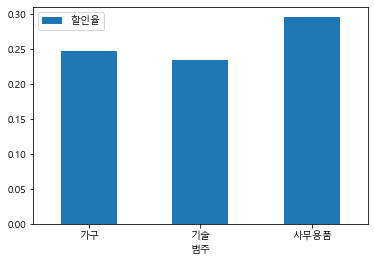

Alex


,할인율
범주,
가구,0.050575
기술,0.044421
사무용품,0.049624


<AxesSubplot:xlabel='범주'>

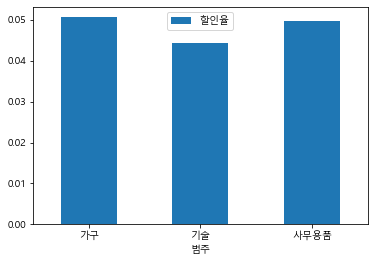

In [59]:
print('Sanjit')
a = pd.DataFrame(Sanjit_Engle.groupby("범주")["할인율"].mean()) # 동남아시아
display(a)
a.plot.bar(rot=0)
plt.show()
print('Alex')
b = pd.DataFrame(Alex_Avila.groupby("범주")["할인율"].mean()) # 북아시아
display(b)
b.plot.bar(rot=0)

---
---

In [60]:
temp_13 = Sanjit_Engle['제품 이름'].values
temp_14 = Alex_Avila['제품 이름'].values
temp_15 = Maribeth_Dona['제품 이름'].values

In [61]:
sum = 0
temp_16 = []
for i in range(len(temp_13)):
    if temp_13[i] in temp_14:
        sum+=1
    else:
        temp_16.append(temp_13[i])

print(sum)
len(temp_16)

2227


900

In [62]:
sum = 0
temp_17 = []
for i in range(len(temp_16)):
    if temp_16[i] in temp_15:
        sum+=1
    else:
        temp_17.append(temp_16[i])

print(sum)
len(temp_17)

519


381

381개 제품 빼고는 해당 제품을 얼마에 어떻게 팔았는지 확인 가능함

---

# 세그먼트, 제품 가격(등급), 할인율의 관계 집중적으로 분석하기
- Sanjit
- Alex   
순서임.

In [63]:
temp_11 = Sanjit_Engle.copy()
temp_12 = Alex_Avila.copy()

temp_11['평균 판매 수량'] = temp_11['수량']
temp_12['평균 판매 수량'] = temp_12['수량']

In [64]:
display(temp_11.groupby(["세그먼트", '제품 가격(등급)']).agg({'단가':'mean', '수량':'sum', '평균 판매 수량' : 'mean', '할인율':'mean', '수익':'mean'}))
display(temp_12.groupby(["세그먼트", '제품 가격(등급)']).agg({'단가':'mean', '수량':'sum', '평균 판매 수량' : 'mean', '할인율':'mean', '수익':'mean'}))

단가    수량  평균 판매 수량       할인율         수익
세그먼트   제품 가격(등급)                                                  
기업     고가          190.929172   810  3.820755  0.244340  -5.663015
       정상가          37.038922  1717  3.653191  0.337426  -7.392408
       최고가        1356.416454   823  3.625551  0.198150  36.925677
일반 소비자 고가          193.027481  1632  3.849057  0.234599  -1.381545
       정상가          38.251840  3159  3.900000  0.314025  -6.375419
       최고가        1324.235649  1474  3.560386  0.197899  38.690966
홈 오피스  고가          201.031829   568  3.863946  0.228776  11.084610
       정상가          37.624966  1119  3.968085  0.336241  -7.056686
       최고가        1207.847074   516  3.659574  0.220922  30.291089

단가    수량  평균 판매 수량       할인율          수익
세그먼트   제품 가격(등급)                                                  
기업     고가          78.726944   737  3.899471  0.033333   64.922635
       정상가         22.331770  1277  3.766962  0.035398   19.088850
       최고가        349.067278   687  3.816667  0.047778  172.634600
일반 소비자 고가          79.356281  1025  3.621908  0.045936   58.785519
       정상가         21.771069  2318  3.812500  0.046875   17.351817
       최고가        344.910253  1077  3.888087  0.061372  194.890917
홈 오피스  고가          83.667886   415  3.772727  0.069091   56.439873
       정상가         23.191622   833  3.752252  0.047297   18.973514
       최고가        369.993828   476  3.718750  0.081250  188.754516

In [65]:
display(temp_11.groupby(["제품 가격(등급)", '세그먼트']).agg({'단가':'mean', '수량':'sum', '평균 판매 수량' : 'mean', '할인율':'mean', '수익':'mean'}))
display(temp_12.groupby(["제품 가격(등급)", '세그먼트']).agg({'단가':'mean', '수량':'sum', '평균 판매 수량' : 'mean', '할인율':'mean', '수익':'mean'}))

단가    수량  평균 판매 수량       할인율         수익
제품 가격(등급) 세그먼트                                                    
고가        기업       190.929172   810  3.820755  0.244340  -5.663015
          일반 소비자   193.027481  1632  3.849057  0.234599  -1.381545
          홈 오피스    201.031829   568  3.863946  0.228776  11.084610
정상가       기업        37.038922  1717  3.653191  0.337426  -7.392408
          일반 소비자    38.251840  3159  3.900000  0.314025  -6.375419
          홈 오피스     37.624966  1119  3.968085  0.336241  -7.056686
최고가       기업      1356.416454   823  3.625551  0.198150  36.925677
          일반 소비자  1324.235649  1474  3.560386  0.197899  38.690966
          홈 오피스   1207.847074   516  3.659574  0.220922  30.291089

단가    수량  평균 판매 수량       할인율          수익
제품 가격(등급) 세그먼트                                                    
고가        기업       78.726944   737  3.899471  0.033333   64.922635
          일반 소비자   79.356281  1025  3.621908  0.045936   58.785519
          홈 오피스    83.667886   415  3.772727  0.069091   56.439873
정상가       기업       22.331770  1277  3.766962  0.035398   19.088850
          일반 소비자   21.771069  2318  3.812500  0.046875   17.351817
          홈 오피스    23.191622   833  3.752252  0.047297   18.973514
최고가       기업      349.067278   687  3.816667  0.047778  172.634600
          일반 소비자  344.910253  1077  3.888087  0.061372  194.890917
          홈 오피스   369.993828   476  3.718750  0.081250  188.754516

---
---

In [69]:
temp = pd.DataFrame(Sanjit_Engle.groupby('제품 이름')['반품'].sum() / Sanjit_Engle.groupby('제품 이름')['주문 ID'].count())
temp = temp.reset_index()
temp.rename(columns ={0:'반품율'}, inplace=True)
Sanjit_Engle = pd.merge(temp, Sanjit_Engle, on = ["제품 이름"])

In [72]:
temp = pd.DataFrame(Alex_Avila.groupby('제품 이름')['반품'].sum() / Alex_Avila.groupby('제품 이름')['주문 ID'].count())
temp = temp.reset_index()
temp.rename(columns ={0:'반품율'}, inplace=True)
Alex_Avila = pd.merge(temp, Alex_Avila, on = ["제품 이름"])

In [76]:
Sanjit_Engle.to_excel('Sanjit_Engle.xlsx', index=False)
Alex_Avila.to_excel('Alex_Avila.xlsx',index=False)

In [80]:
temp = Sanjit_Engle[['제품 이름', '반품율']]

In [111]:
temp = pd.read_excel('temp.xlsx')

In [112]:
temp

,제품 이름,주 구매 고객,반품율,평균 수익,할인율
0,"Belkin Mouse, Programmable",Silver,0.00,12.5010,0.15
1,"Belkin Mouse, Programmable",Silver,0.00,-8.3340,0.15
2,"Belkin Mouse, USB",Platinum,0.00,-10.1508,0.17
3,"Belkin Mouse, USB",Gold,0.00,-39.9870,0.15
4,"Belkin Mouse, USB",Platinum,0.00,-25.3770,0.00
5,"Belkin Numeric Keypad, Bluetooth",Platinum,0.00,-1.8612,0.00
6,"Cardinal Binding Machine, Recycled",Gold,0.35,-1.8612,0.15
7,"Cardinal Binding Machine, Recycled",Curning,0.00,13.3536,0.00
8,"Cardinal Binding Machine, Recycled",Churn Risk,0.00,19.7400,0.15
9,"Cardinal Hole Reinforcements, Clear",New,0.00,-10.8630,0.15
